In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Up

In [9]:
# LOAD RESULTS
res_p = '/Users/harveyaa/Documents/masters/neuropsych_mtl/ML/benchmark_2/results/results.csv'
out_p = './results/'

results = pd.read_csv(res_p,index_col=0,header=[0,1])

In [10]:
results

LR                 SVC               Ridge            \
                conf      conn      conf      conn      conf      conn   
SZ          0.512698  0.785714  0.571429  0.752381  0.519048  0.739683   
ASD         0.468655  0.593688  0.453260  0.583153  0.479312  0.579408   
BIP         0.486961  0.644673  0.493720  0.624769  0.502058  0.621079   
DEL22q11_2  0.557143  0.829048  0.652857  0.850000  0.599048  0.835238   
DUP22q11_2  0.463889  0.569444  0.477778  0.536111  0.418056  0.569444   
DEL16p11_2  0.562990  0.719677  0.490052  0.712270  0.532699  0.719677   
DUP16p11_2  0.468889  0.546667  0.413333  0.532222  0.418889  0.548889   
DEL1q21_1   0.466667  0.543791  0.488889  0.544444  0.466667  0.532026   
DUP1q21_1   0.459524  0.630952  0.385714  0.614286  0.414286  0.642857   

                 GNB                  RF                 kNN            
                conf      conn      conf      conn      conf      conn  
SZ          0.503175  0.647619  0.604762  0.660317  0.558730  0.638095  
ASD         0.465807  0.496999  0.477156  0.572159  0.510520  0.534152  
BIP         0.528300  0.574424  0.493056  0.500000  0.489996  0.572480  
DEL22q11_2  0.644286  0.637619  0.529048  0.663810  0.520476  0.540952  
DUP22q11_2  0.466667  0.534722  0.465278  0.568056  0.498611  0.362500  
DEL16p11_2  0.451542  0.630355  0.555697  0.566507  0.558210  0.652294  
DUP16p11_2  0.450000  0.550000  0.424444  0.571111  0.526667  0.431111  
DEL1q21_1   0.463399  0.523529  0.385621  0.442484  0.478431  0.501961  
DUP1q21_1   0.521429  0.457143  0.395238  0.440476  0.511905  0.545238

In [11]:
clfs = ['LR','SVC','Ridge','GNB','RF','kNN']
cases = ['DUP1q21_1','DEL1q21_1','DUP22q11_2','DUP16p11_2','DEL16p11_2','DEL22q11_2','ASD','SZ','BIP']

# Benchmark Plot

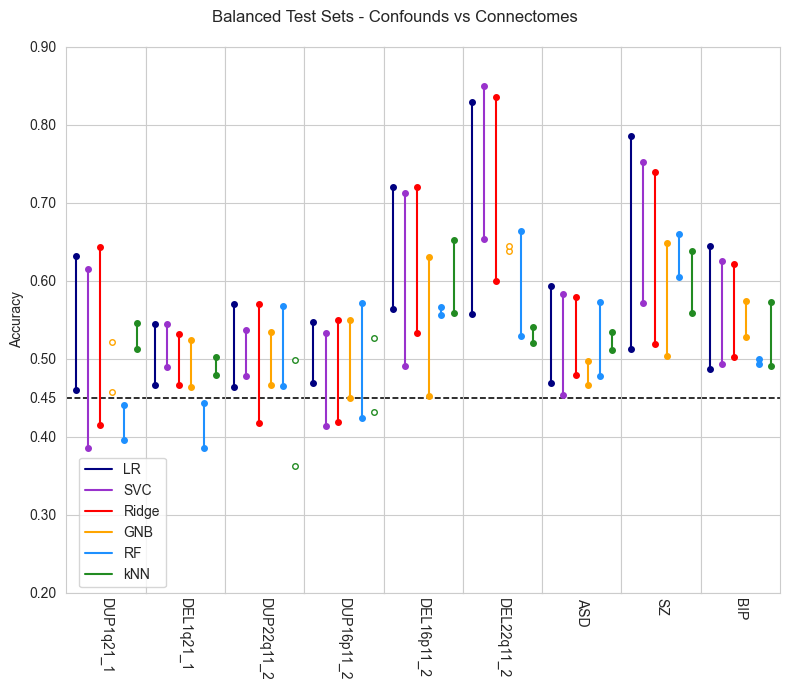

In [12]:
##################
# BENCHMARK PLOT #
##################
title = 'Balanced Test Sets - Confounds vs Connectomes'

fig,ax = plt.subplots(1,len(cases),figsize=(8,7),sharey=True,sharex=True)

plt.yticks([0,0.1,0.2,0.3,0.4,0.45,0.5,0,55,0.6,0.7,0.8,0.9,1])
sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']
for j,case in enumerate(cases):
    for i,clf in enumerate(clfs):
        conf_acc = results[clf].loc[case,'conf']
        conn_acc = results[clf].loc[case,'conn']

        if conf_acc > conn_acc:
            mfc = 'white'
            ls =''
        else:
            mfc = colors[i]
            ls = '-'
        ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.75,5.75)

        ax[j].set_xlabel(case,rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

handles, _ = ax[-1].get_legend_handles_labels()
labels = clfs

ax[0].set_ylabel('Accuracy')
fig.legend(handles, labels, loc=(0.1,0.15))
plt.suptitle(title)
plt.ylim(0.2,0.9)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(out_p,'benchmark.png'),dpi=300)

# Confounds Plot

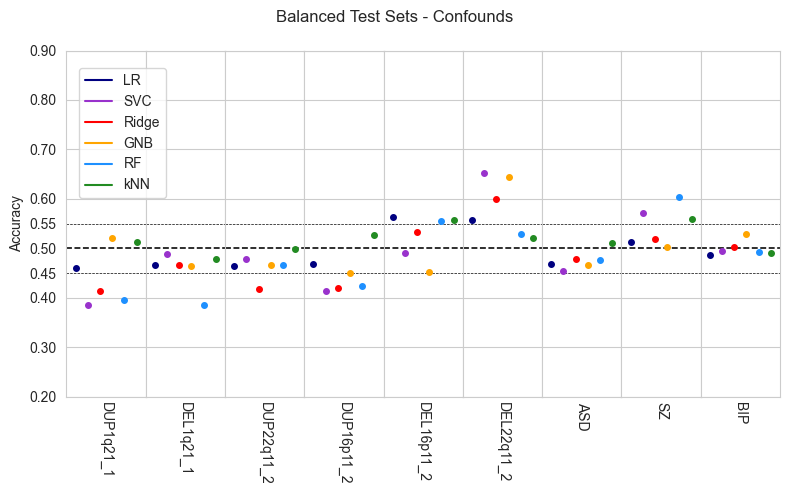

In [13]:
title = 'Balanced Test Sets - Confounds'

fig,ax = plt.subplots(1,len(cases),figsize=(8,5),sharey=True,sharex=True)

plt.yticks([0,0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9,1])
sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']
for j,case in enumerate(cases):
    for i,clf in enumerate(clfs):
        conf_acc = results[clf].loc[case,'conf']

        mfc = colors[i]
        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.75,5.75)

        ax[j].set_xlabel(case,rotation=270)

        lines = ax[j].get_ygridlines()
        # 0.45
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(0.5)
        b.set_linestyle('--')

        # 0.50
        b = lines[6]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

        # 0.55
        b = lines[7]
        b.set_color('black')
        b.set_linewidth(0.5)
        b.set_linestyle('--')

#handles, _ = ax[0].get_legend_handles_labels()
labels = clfs

ax[0].set_ylabel('Accuracy')
fig.legend(handles, labels, loc=(0.1,0.6))
plt.suptitle(title)
plt.ylim(0.2,0.9)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(out_p,'confounds.png'),dpi=300)